# HomeWork 8
**DeadLine : 23:59 29 Aban 1400**

**Total points : 100pts**

# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [ ]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

Cloning into 'google-images-download'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 719 (delta 32), reused 48 (delta 32), pack-reused 666
Receiving objects: 100% (719/719), 319.77 KiB | 3.48 MiB/s, done.
Resolving deltas: 100% (422/422), done.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating google_images_download.egg-info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_images

costom dataset config:

In [ ]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [ ]:
!googleimagesdownload -cf dataset.json


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2019-honda-civic-sedan-1558453497.jpg?crop=1xw:0.9997727789138833xh;center,top&resize=480:*
Completed Image ====> 1.2019-honda-civic-sedan-1558453497.jpg
Image URL: https://cars.usnews.com/static/images/Auto/custom/14737/2022_Acura_ILX_1.jpg
IOError on an image...trying next one... Error: The read operation timed out
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2022-chevrolet-corvette-z06-1607016574.jpg?crop=0.737xw:0.738xh;0.181xw,0.218xh&resize=640:*
Completed Image ====> 2.2022-chevrolet-corvette-z06-1607016574.jpg
Image URL: https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit-640x354.jpg
Completed Image ====> 3.sonata-hero-option1-764a5360-edit-640x354.jpg
Image URL: https://www.cnet.com/a/img/CSTqzAl5wJ57HHyASLD-a0vS2O0=/940x528/2021/04/05/9e065d90-51f2-46c5-bd3a-416fd4983c1a/elan

## 2.2 Splite data To train set && test set

In [ ]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

In [ ]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


60
60
60
60
60


In [ ]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


## 2.2. Copy Training data to Google Drive

In [ ]:
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
shutil.move('./train/', destination)
shutil.move('./test/', destination)


'/content/drive/MyDrive/HW7_Dataset/test'

In [ ]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 3. Load Dataset From Google Drive

In [6]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test/'+ ' ./')


0

In [7]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 4. Generator

In [8]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
shape = (150, 150)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('train',
        target_size=shape,
        batch_size=batch_size)
validation_generator = test_datagen.flow_from_directory('test',
        target_size=shape,
        batch_size=batch_size)

Found 218 images belonging to 5 classes.
Found 58 images belonging to 5 classes.


In [9]:
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

(16, 150, 150, 3)
(16, 5)


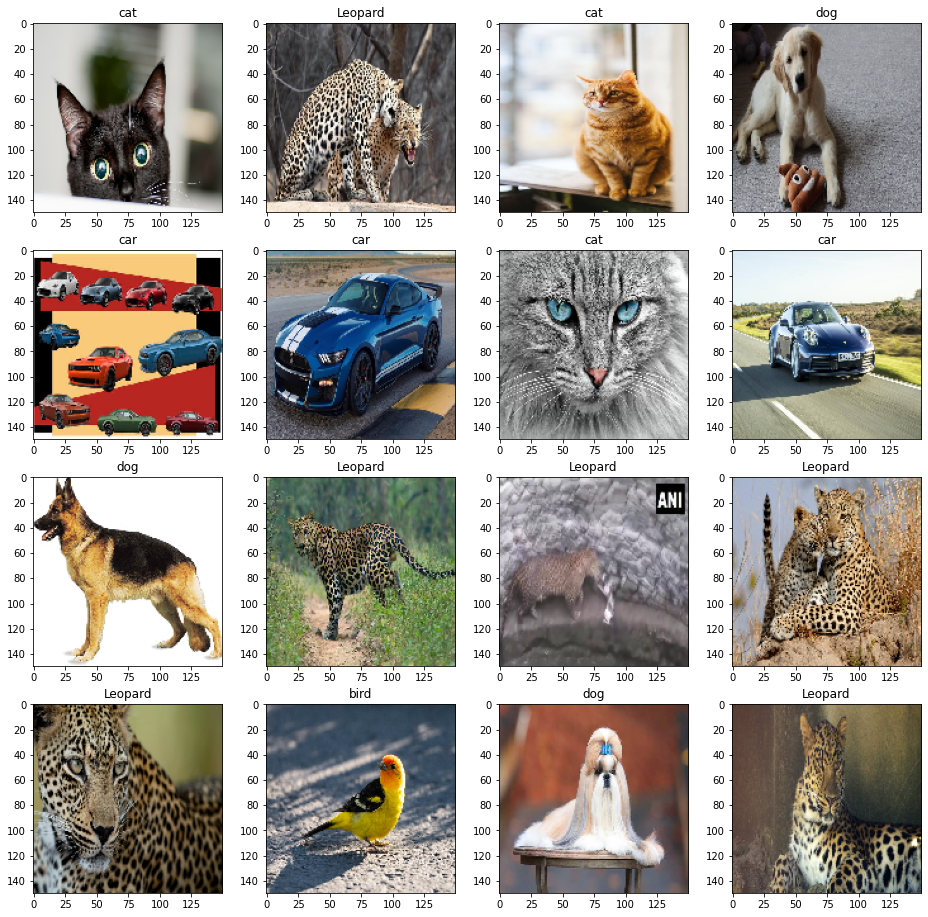

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(3)

def plot_img(x_train, y_train):
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img)
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)


# Part A: build and train model without using data augmentation

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.losses import CategoricalCrossentropy
import tensorflow as tf

def build_model():
  kernel = 3
  model = Sequential()
  model.add(Conv2D(16, kernel, activation='relu', input_shape=(shape[0], shape[1], 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, kernel, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, kernel, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(128, kernel, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  return model

Epoch 1/15
 1/14 [=>............................] - ETA: 12s - loss: 1.5722 - accuracy: 0.2000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 515ms/step - loss: 1.6210 - accuracy: 0.1881 - val_loss: 1.5740 - val_accuracy: 0.3448
Epoch 2/15
14/14 [==============================] - 7s 484ms/step - loss: 1.4999 - accuracy: 0.3486 - val_loss: 1.4168 - val_accuracy: 0.3276
Epoch 3/15
14/14 [==============================] - 7s 492ms/step - loss: 1.4256 - accuracy: 0.3440 - val_loss: 1.4882 - val_accuracy: 0.3103
Epoch 4/15
14/14 [==============================] - 7s 477ms/step - loss: 1.2465 - accuracy: 0.4587 - val_loss: 1.3698 - val_accuracy: 0.4138
Epoch 5/15
14/14 [==============================] - 7s 480ms/step - loss: 1.0895 - accuracy: 0.5459 - val_loss: 1.3869 - val_accuracy: 0.4828
Epoch 6/15
14/14 [==============================] - 7s 479ms/step - loss: 1.1111 - accuracy: 0.4771 - val_loss: 1.0919 - val_accuracy: 0.5172
Epoch 7/15
14/14 [==============================] - 7s 482ms/step - loss: 0.9354 - accuracy: 0.6193 - val_loss: 1.1395 - val_accuracy: 0.6207
Epoch 8/15
14/14 

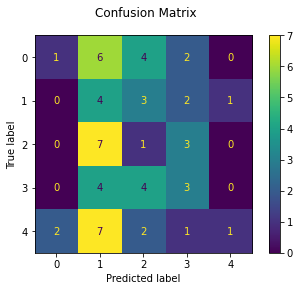

In [35]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


EPOCHS=15
BATCH=32
model = build_model()
loss = CategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH, validation_data=validation_generator)


yhat_probs = model.predict(validation_generator)
predicted = np.argmax(yhat_probs, axis=1)

print("\n")
print(
    f"{classification_report(validation_generator.labels, predicted)}\n"
)

disp = ConfusionMatrixDisplay.from_predictions(validation_generator.labels, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [36]:
model.evaluate(validation_generator, batch_size=BATCH)

2/4 [==============>...............] - ETA: 0s - loss: 2.0941 - accuracy: 0.4062

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 179ms/step - loss: 2.3177 - accuracy: 0.3793


[2.3176822662353516, 0.37931033968925476]

# Part B: train model using data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen_aug1 = ImageDataGenerator(rescale=1./255,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2)

train_generator_aug1 = train_datagen_aug1.flow_from_directory('train',
        target_size=shape,
        batch_size=batch_size)

Found 218 images belonging to 5 classes.


In [ ]:
EPOCHS2 = 50
BATCH2 = 64

model2 = build_model()

model2.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model2.fit(train_generator_aug1, epochs=EPOCHS2, batch_size=BATCH2, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
14/14 [==============================] - 5s 308ms/step - loss: 1.7302 - accuracy: 0.1789 - val_loss: 1.6092 - val_accuracy: 0.1897
Epoch 2/50
14/14 [==============================] - 4s 282ms/step - loss: 1.6116 - accuracy: 0.2018 - val_loss: 1.6089 - val_accuracy: 0.2241
Epoch 3/50
14/14 [==============================] - 4s 274ms/step - loss: 1.6081 - accuracy: 0.1789 - val_loss: 1.6060 - val_accuracy: 0.2241
Epoch 4/50
14/14 [==============================] - 4s 272ms/step - loss: 1.6094 - accuracy: 0.2018 - val_loss: 1.5727 - val_accuracy: 0.2241
Epoch 5/50
14/14 [==============================] - 4s 281ms/step - loss: 1.5883 - accuracy: 0.2339 - val_loss: 1.5546 - val_accuracy: 0.2414
Epoch 6/50
14/14 [==============================] - 4s 278ms/step - loss: 1.5704 - accuracy: 0.2431 - val_loss: 2.0699 - val_accuracy: 0.2586
Epoch 7/50
14/14 [==============================] - 4s 277ms/step - loss: 1.5131 - accuracy: 0.3349 - val_loss: 2.0661 - val_accuracy: 0.2759
Epoch 

In [ ]:
model2.evaluate(validation_generator, batch_size=BATCH)

2/4 [==============>...............] - ETA: 0s - loss: 1.3016 - accuracy: 0.6562

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 142ms/step - loss: 1.5009 - accuracy: 0.5690


[1.5009173154830933, 0.568965494632721]

In [ ]:
train_datagen_aug2 = ImageDataGenerator(rescale=1./255,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        horizontal_flip=True)

train_generator_aug2 = train_datagen_aug2.flow_from_directory('train',
        target_size=shape,
        batch_size=batch_size)

model3 = build_model()
model3.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
model3.fit(train_generator_aug2, epochs=EPOCHS2, batch_size=BATCH2, validation_data=validation_generator)

Found 218 images belonging to 5 classes.
Epoch 1/50
 1/14 [=>............................] - ETA: 10s - loss: 1.5996 - accuracy: 0.2500

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 5s 299ms/step - loss: 1.6441 - accuracy: 0.1606 - val_loss: 1.6174 - val_accuracy: 0.1724
Epoch 2/50
14/14 [==============================] - 4s 270ms/step - loss: 1.6128 - accuracy: 0.1835 - val_loss: 1.6095 - val_accuracy: 0.1724
Epoch 3/50
14/14 [==============================] - 4s 268ms/step - loss: 1.6096 - accuracy: 0.2064 - val_loss: 1.6099 - val_accuracy: 0.1724
Epoch 4/50
14/14 [==============================] - 4s 270ms/step - loss: 1.6079 - accuracy: 0.1972 - val_loss: 1.6096 - val_accuracy: 0.2241
Epoch 5/50
14/14 [==============================] - 4s 267ms/step - loss: 1.6082 - accuracy: 0.2110 - val_loss: 1.6094 - val_accuracy: 0.2241
Epoch 6/50
14/14 [==============================] - 4s 271ms/step - loss: 1.6083 - accuracy: 0.2156 - val_loss: 1.6019 - val_accuracy: 0.2414
Epoch 7/50
14/14 [==============================] - 4s 272ms/step - loss: 1.6086 - accuracy: 0.2706 - val_loss: 1.5439 - val_accuracy: 0.2931
Epoch 8/50
14/14 

In [ ]:
model3.evaluate(validation_generator, batch_size=BATCH)

4/4 [==============================] - 1s 151ms/step - loss: 0.9824 - accuracy: 0.7414


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.9823940992355347, 0.7413793206214905]

# Part C: build and train model with dropout

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.losses import CategoricalCrossentropy
import tensorflow as tf

def build_model2(p):
  kernel = 3
  model = Sequential()
  model.add(Conv2D(16, kernel, activation='relu', input_shape=(shape[0], shape[1], 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(p))

  model.add(Conv2D(32, kernel, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(p))

  model.add(Conv2D(64, kernel, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(p))
  
  model.add(Conv2D(128, kernel, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(p))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(5, activation='softmax'))
  return model

Epoch 1/20
 1/14 [=>............................] - ETA: 15s - loss: 1.5969 - accuracy: 0.2500

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 530ms/step - loss: 1.6366 - accuracy: 0.1789 - val_loss: 1.5914 - val_accuracy: 0.2759
Epoch 2/20
14/14 [==============================] - 7s 515ms/step - loss: 1.5362 - accuracy: 0.3349 - val_loss: 1.4664 - val_accuracy: 0.2931
Epoch 3/20
14/14 [==============================] - 7s 513ms/step - loss: 1.4576 - accuracy: 0.3670 - val_loss: 1.4826 - val_accuracy: 0.3621
Epoch 4/20
14/14 [==============================] - 7s 506ms/step - loss: 1.3534 - accuracy: 0.3853 - val_loss: 1.2731 - val_accuracy: 0.4655
Epoch 5/20
14/14 [==============================] - 7s 519ms/step - loss: 1.2836 - accuracy: 0.4220 - val_loss: 1.1726 - val_accuracy: 0.5345
Epoch 6/20
14/14 [==============================] - 7s 496ms/step - loss: 1.1371 - accuracy: 0.5550 - val_loss: 1.0735 - val_accuracy: 0.5000
Epoch 7/20
14/14 [==============================] - 7s 495ms/step - loss: 1.0341 - accuracy: 0.5505 - val_loss: 1.1162 - val_accuracy: 0.5000
Epoch 8/20
14/14 

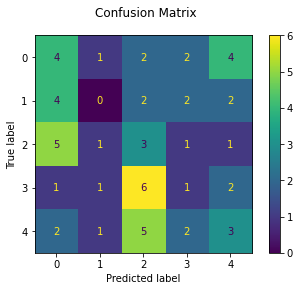

In [37]:
EPOCHS4=20
BATCH4=32

model4 = build_model2(0.1)
loss4 = CategoricalCrossentropy(from_logits=False)
optimizer4 = tf.keras.optimizers.Adam()
model4.compile(loss=loss4, optimizer= optimizer4, metrics=['accuracy'])
model4.fit(train_generator, epochs=EPOCHS4, batch_size=BATCH4, validation_data=validation_generator)

yhat_probs4 = model4.predict(validation_generator)
predicted4 = np.argmax(yhat_probs4, axis=1)

print("\n")
print(
    f"{classification_report(validation_generator.labels, predicted4)}\n"
)

disp = ConfusionMatrixDisplay.from_predictions(validation_generator.labels, predicted4)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [38]:
model4.evaluate(validation_generator, batch_size=BATCH4)

1/4 [======>.......................] - ETA: 0s - loss: 2.4888 - accuracy: 0.6250

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 196ms/step - loss: 2.1222 - accuracy: 0.6207


[2.122199058532715, 0.6206896305084229]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/20
14/14 [==============================] - 8s 529ms/step - loss: 1.7896 - accuracy: 0.2156 - val_loss: 1.6141 - val_accuracy: 0.1897
Epoch 2/20
14/14 [==============================] - 7s 511ms/step - loss: 1.6147 - accuracy: 0.1789 - val_loss: 1.6099 - val_accuracy: 0.1552
Epoch 3/20
14/14 [==============================] - 7s 510ms/step - loss: 1.6116 - accuracy: 0.1789 - val_loss: 1.6095 - val_accuracy: 0.1724
Epoch 4/20
14/14 [==============================] - 7s 520ms/step - loss: 1.6066 - accuracy: 0.2202 - val_loss: 1.6032 - val_accuracy: 0.3276
Epoch 5/20
14/14 [==============================] - 7s 518ms/step - loss: 1.5944 - accuracy: 0.2615 - val_loss: 1.6098 - val_accuracy: 0.1897
Epoch 6/20
14/14 [==============================] - 7s 517ms/step - loss: 1.6091 - accuracy: 0.2064 - val_loss: 1.6148 - val_accuracy: 0.1897
Epoch 7/20
14/14 [==============================] - 7s 509ms/step - loss: 1.6032 - accuracy: 0.1789 - val_loss: 1.5970 - val_accuracy: 0.3103
Epoch 

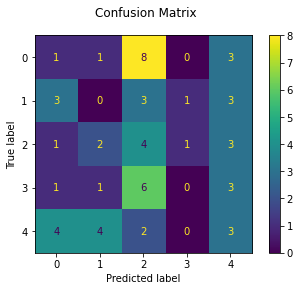

In [39]:
model5 = build_model2(0.2)

model5.compile(loss=loss4, optimizer= optimizer4, metrics=['accuracy'])
model5.fit(train_generator, epochs=EPOCHS4, batch_size=BATCH4, validation_data=validation_generator)


yhat_probs5 = model5.predict(validation_generator)
predicted5 = np.argmax(yhat_probs5, axis=1)

print("\n")
print(
    f"{classification_report(validation_generator.labels, predicted5)}\n"
)

disp = ConfusionMatrixDisplay.from_predictions(validation_generator.labels, predicted5)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [40]:
model5.evaluate(validation_generator, batch_size=BATCH4)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 207ms/step - loss: 1.4875 - accuracy: 0.4828


[1.487547516822815, 0.48275861144065857]